# Twitter sentiment analysis - COVID19

This notebook process basic sentiment analysis that is one of the
tools of NLP (Natural Language Processing). 

The goal is to analyse current global topic **COVID-19** by extracting number of tweets from Twitter containing keyword "covid19". 

To get data I am going to use **Tweepy** library to access Twitter API, which is available to anyone after creating a Twitter developer account.

Extracted data is going to be cleaned and prepared for following sentiment analysis by using **TextBlob** library.

Finally I am going to visualize the data as **WordClouds**, which is an easy way to find and display the most common words in provided text.



In [1]:
import tweepy
import emoji
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from PIL import Image
import re
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 115
plt.style.use("fivethirtyeight")
from typing import Dict, Any, List


### 1) Getting data from Twitter API, preparing and cleaning dataframe for further processing

- https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api

In [2]:
%time

consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

# create auth object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# set access token and access secret token
auth.set_access_token(access_token, access_token_secret)

# create tweety API object
api = tweepy.API(auth)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs


In [3]:
%%time

# set keyword and number of tweets to fetch 
keyword="covid19"
nbr_tweets = 2000

# create tweepy cursor
tweets = tweepy.Cursor(api.search, q=keyword, lang="en").items(nbr_tweets)


CPU times: user 104 µs, sys: 1 µs, total: 105 µs
Wall time: 106 µs


In [4]:
%%time

# create a DF with one column called tweets
df = pd.DataFrame([tweet.text for tweet in tweets], columns=['tweets'])

df.head()


CPU times: user 5.53 s, sys: 703 ms, total: 6.23 s
Wall time: 1min 29s


,tweets
0,RT @NaheedD: Who else thinks it's time we make the #COVID19 vaccine mandatory for all healthcare workers?
1,RT @smbstory: Business shutdowns due to #COVID19 are real. This edition of SMBStory Specials goes on a hunt to uncover the story of a darsh…
2,Several national organizations in the U.S. in epidemiology and infection prevention say #COVID19 vaccines should be… https://t.co/fBXWA5SxNU
3,"RT @DanKassis: TN @GovBillLee fired our top vaccine prevention official yesterday with no explanation, following @tnsenate @TNHouseReps com…"
4,RT @aung_myo_minn: 1/3 Those acts show the regime’s lack of political will and its intent to take political advantage of the #COVID19 thir…


In [5]:
%%time

# clean data
def clean_text(text):
    text = re.sub(r'RT\s+@\w+:', '', text) # removing RT - retweets
    text = re.sub(r'@[\w]+', '', text) # remove @menations
    text = re.sub(r'#', '', text) # removing # smybol
    text = re.sub(r'https?:\/\/[\w.\/]+[^\s]', '', text) # remove hyperlinks
    text = re.sub(emoji.get_emoji_regexp(), r"", text) # remove emojis
    return text


df["tweets"] = df["tweets"].apply(clean_text)

# deduplicate df
print("Tweets before deduplication:", df.shape[0])
df.drop_duplicates(inplace = True)
print("Tweets after deduplication:", df.shape[0])

df.head()


Tweets before deduplication: 2000
Tweets after deduplication: 1184
CPU times: user 1.32 s, sys: 9.28 ms, total: 1.33 s
Wall time: 1.34 s


,tweets
0,Who else thinks it's time we make the COVID19 vaccine mandatory for all healthcare workers?
1,Business shutdowns due to COVID19 are real. This edition of SMBStory Specials goes on a hunt to uncover the story of a darsh…
2,Several national organizations in the U.S. in epidemiology and infection prevention say COVID19 vaccines should be…
3,"TN fired our top vaccine prevention official yesterday with no explanation, following com…"
4,1/3 Those acts show the regime’s lack of political will and its intent to take political advantage of the COVID19 thir…


### 2) Using TextBlob to compute sentiment and display results in pie chart as well as in scatter plot

Getting sentiment subjectivity - polarity from TextBlob library
https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob.sentiment: 
- polarity is a float within the range [-1.0, 1.0] 
- subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective



In [6]:
%%time

# function to get the subjectivity
def get_subjectivity(tweet: str) -> float:
    return TextBlob(tweet).sentiment.subjectivity

# function to get the polarity
def get_polarity(tweet: str) -> float:
    return TextBlob(tweet).sentiment.polarity

# add new columns to dataframe - subjectivity, polarity
df["subjectivity"] = df["tweets"].apply(get_subjectivity)
df["polarity"] = df["tweets"].apply(get_polarity)

df.head()


CPU times: user 417 ms, sys: 33.5 ms, total: 450 ms
Wall time: 474 ms


,tweets,subjectivity,polarity
0,Who else thinks it's time we make the COVID19 vaccine mandatory for all healthcare workers?,0.0000,0.0000
1,Business shutdowns due to COVID19 are real. This edition of SMBStory Specials goes on a hunt to uncover the story of a darsh…,0.3375,0.0375
2,Several national organizations in the U.S. in epidemiology and infection prevention say COVID19 vaccines should be…,0.0000,0.0000
3,"TN fired our top vaccine prevention official yesterday with no explanation, following com…",0.3000,0.2500
4,1/3 Those acts show the regime’s lack of political will and its intent to take political advantage of the COVID19 thir…,0.1000,0.0000


In [7]:
%%time

# function that computes the negative, neutral and positive sentiment
def get_sentiment(score: float) -> str:
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"
    
df["sentiment"] = df["polarity"].apply(get_sentiment)

df.head()


CPU times: user 798 µs, sys: 33 µs, total: 831 µs
Wall time: 810 µs


,tweets,subjectivity,polarity,sentiment
0,Who else thinks it's time we make the COVID19 vaccine mandatory for all healthcare workers?,0.0000,0.0000,neutral
1,Business shutdowns due to COVID19 are real. This edition of SMBStory Specials goes on a hunt to uncover the story of a darsh…,0.3375,0.0375,positive
2,Several national organizations in the U.S. in epidemiology and infection prevention say COVID19 vaccines should be…,0.0000,0.0000,neutral
3,"TN fired our top vaccine prevention official yesterday with no explanation, following com…",0.3000,0.2500,positive
4,1/3 Those acts show the regime’s lack of political will and its intent to take political advantage of the COVID19 thir…,0.1000,0.0000,neutral


In [8]:
# function that returns total sentiment and percentage
def get_percantage(df: pd.DataFrame, col: str) -> pd.DataFrame:
    data = df.get(col).value_counts().to_frame().rename(columns={"sentiment":"sentiment_total"})
    data["percentage"] = round(df.get(col).value_counts(normalize=True) * 100, 2)
    return data


get_percantage(df, "sentiment")


,sentiment_total,percentage
neutral,525,44.34
positive,439,37.08
negative,220,18.58


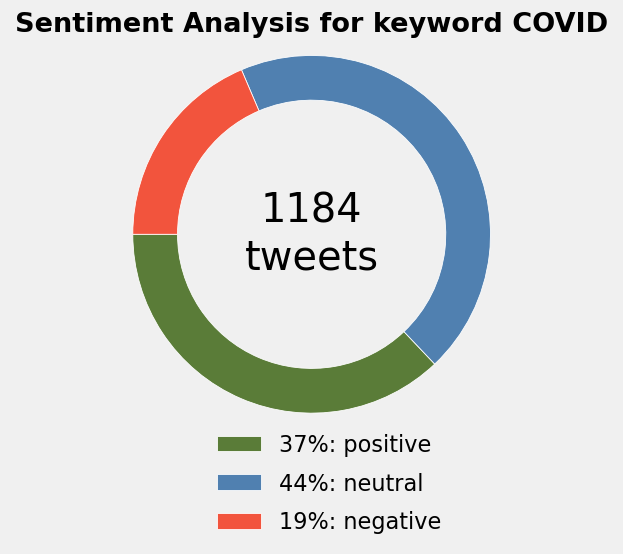

In [9]:
# create pie chart
def make_pie(df: pd.DataFrame, colors: List, header: str) -> None:
    
        # sort the index, because of the colors order - positive:green, neutral:blue, negative:red
        df = df.sort_index(ascending=False)
        
        total = sum(df.iloc[:,0])
        
        fig, ax = plt.subplots()
        ax.axis('equal')

        ax.set_prop_cycle("color", colors)
        
        outside, _ = ax.pie(df.iloc[:,0], radius=1.2, startangle=180)

        plt.setp(outside, width=0.3, edgecolor='white')

        ax.text(0, 0, f"{total}\ntweets", ha='center', va='center', size=25)
        
        ax.legend(['{:.0f}%: {}'.format(int(row.values) / total * 100, index) for index, row in df.iterrows()],
                  frameon=False, bbox_to_anchor=(0.75, 0.02), labelspacing=0.7)
        
        ax.annotate(header, size=17, fontweight="semibold", xy=(1, 1), xycoords='data',
                    horizontalalignment='center', verticalalignment='top', xytext=(0, 1.5))

        plt.show()
        

data = get_percantage(df, "sentiment")[['sentiment_total']]
colors = ['#5a7c38','#5080b0','#F2543D']
header = 'Sentiment Analysis for keyword COVID'

make_pie(data, colors=colors, header=header)





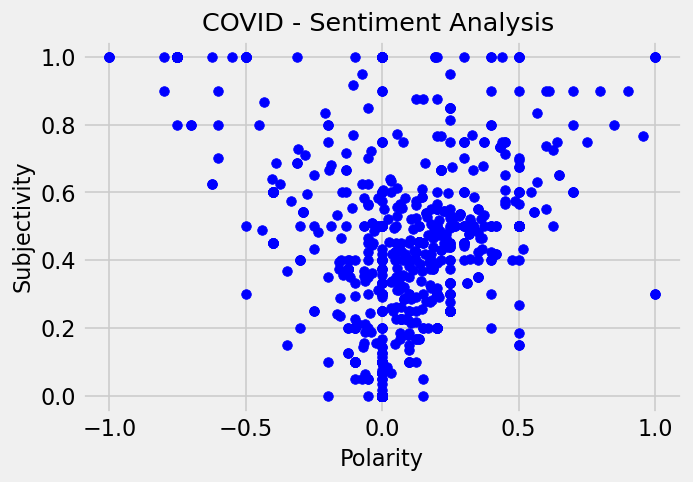

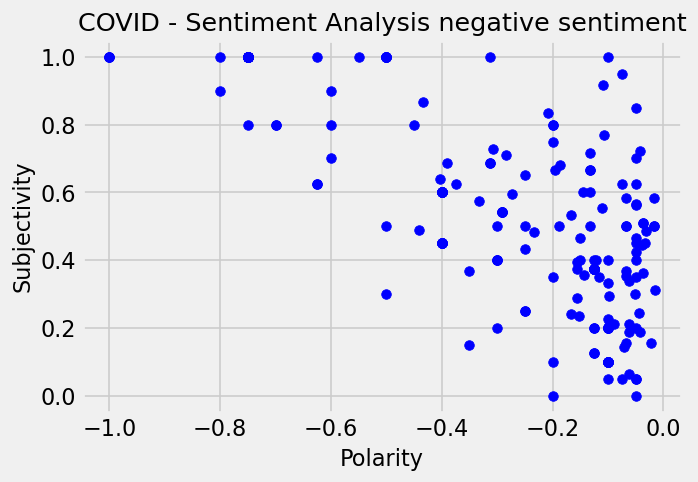

In [10]:
# display polarity and subjectivity
def create_scatterplot(data: pd.DataFrame, title: str = "") -> None:
    plt.scatter(data["polarity"], data["subjectivity"], color="Blue")

    plt.title(f"COVID - Sentiment Analysis {title}", size=16)
    plt.xlabel("Polarity", size=14)
    plt.ylabel("Subjectivity", size=14)
    
    plt.show()

create_scatterplot(df)
create_scatterplot(df.query("sentiment == 'negative'"), "negative sentiment")


## 3) Tweet length and word count


In [11]:
# calculate tweet length
df['tweet_len'] = df['tweets'].astype(str).apply(len)

# calculate tweet word count
df['tweet_word_cnt'] = df['tweets'].astype(str).str.split().str.len()

df.head()

,tweets,subjectivity,polarity,sentiment,tweet_len,tweet_word_cnt
0,Who else thinks it's time we make the COVID19 vaccine mandatory for all healthcare workers?,0.0000,0.0000,neutral,92,15
1,Business shutdowns due to COVID19 are real. This edition of SMBStory Specials goes on a hunt to uncover the story of a darsh…,0.3375,0.0375,positive,126,23
2,Several national organizations in the U.S. in epidemiology and infection prevention say COVID19 vaccines should be…,0.0000,0.0000,neutral,116,16
3,"TN fired our top vaccine prevention official yesterday with no explanation, following com…",0.3000,0.2500,positive,94,13
4,1/3 Those acts show the regime’s lack of political will and its intent to take political advantage of the COVID19 thir…,0.1000,0.0000,neutral,121,21


In [12]:
# display average tweet word count by sentiment
round(df.groupby("sentiment")[["tweet_word_cnt"]].mean(), 2)

,tweet_word_cnt
sentiment,
negative,18.04
neutral,15.98
positive,17.92


In [13]:
# display average tweet length by sentiment
round(df.groupby("sentiment")[["tweet_len"]].mean(), 2)

,tweet_len
sentiment,
negative,113.44
neutral,102.61
positive,110.80


## 4) WordCloud

Finally display wordclouds: 
- world template wordcloud for all tweets
- cloud tempalte for separate negative/positive/neutral tweets


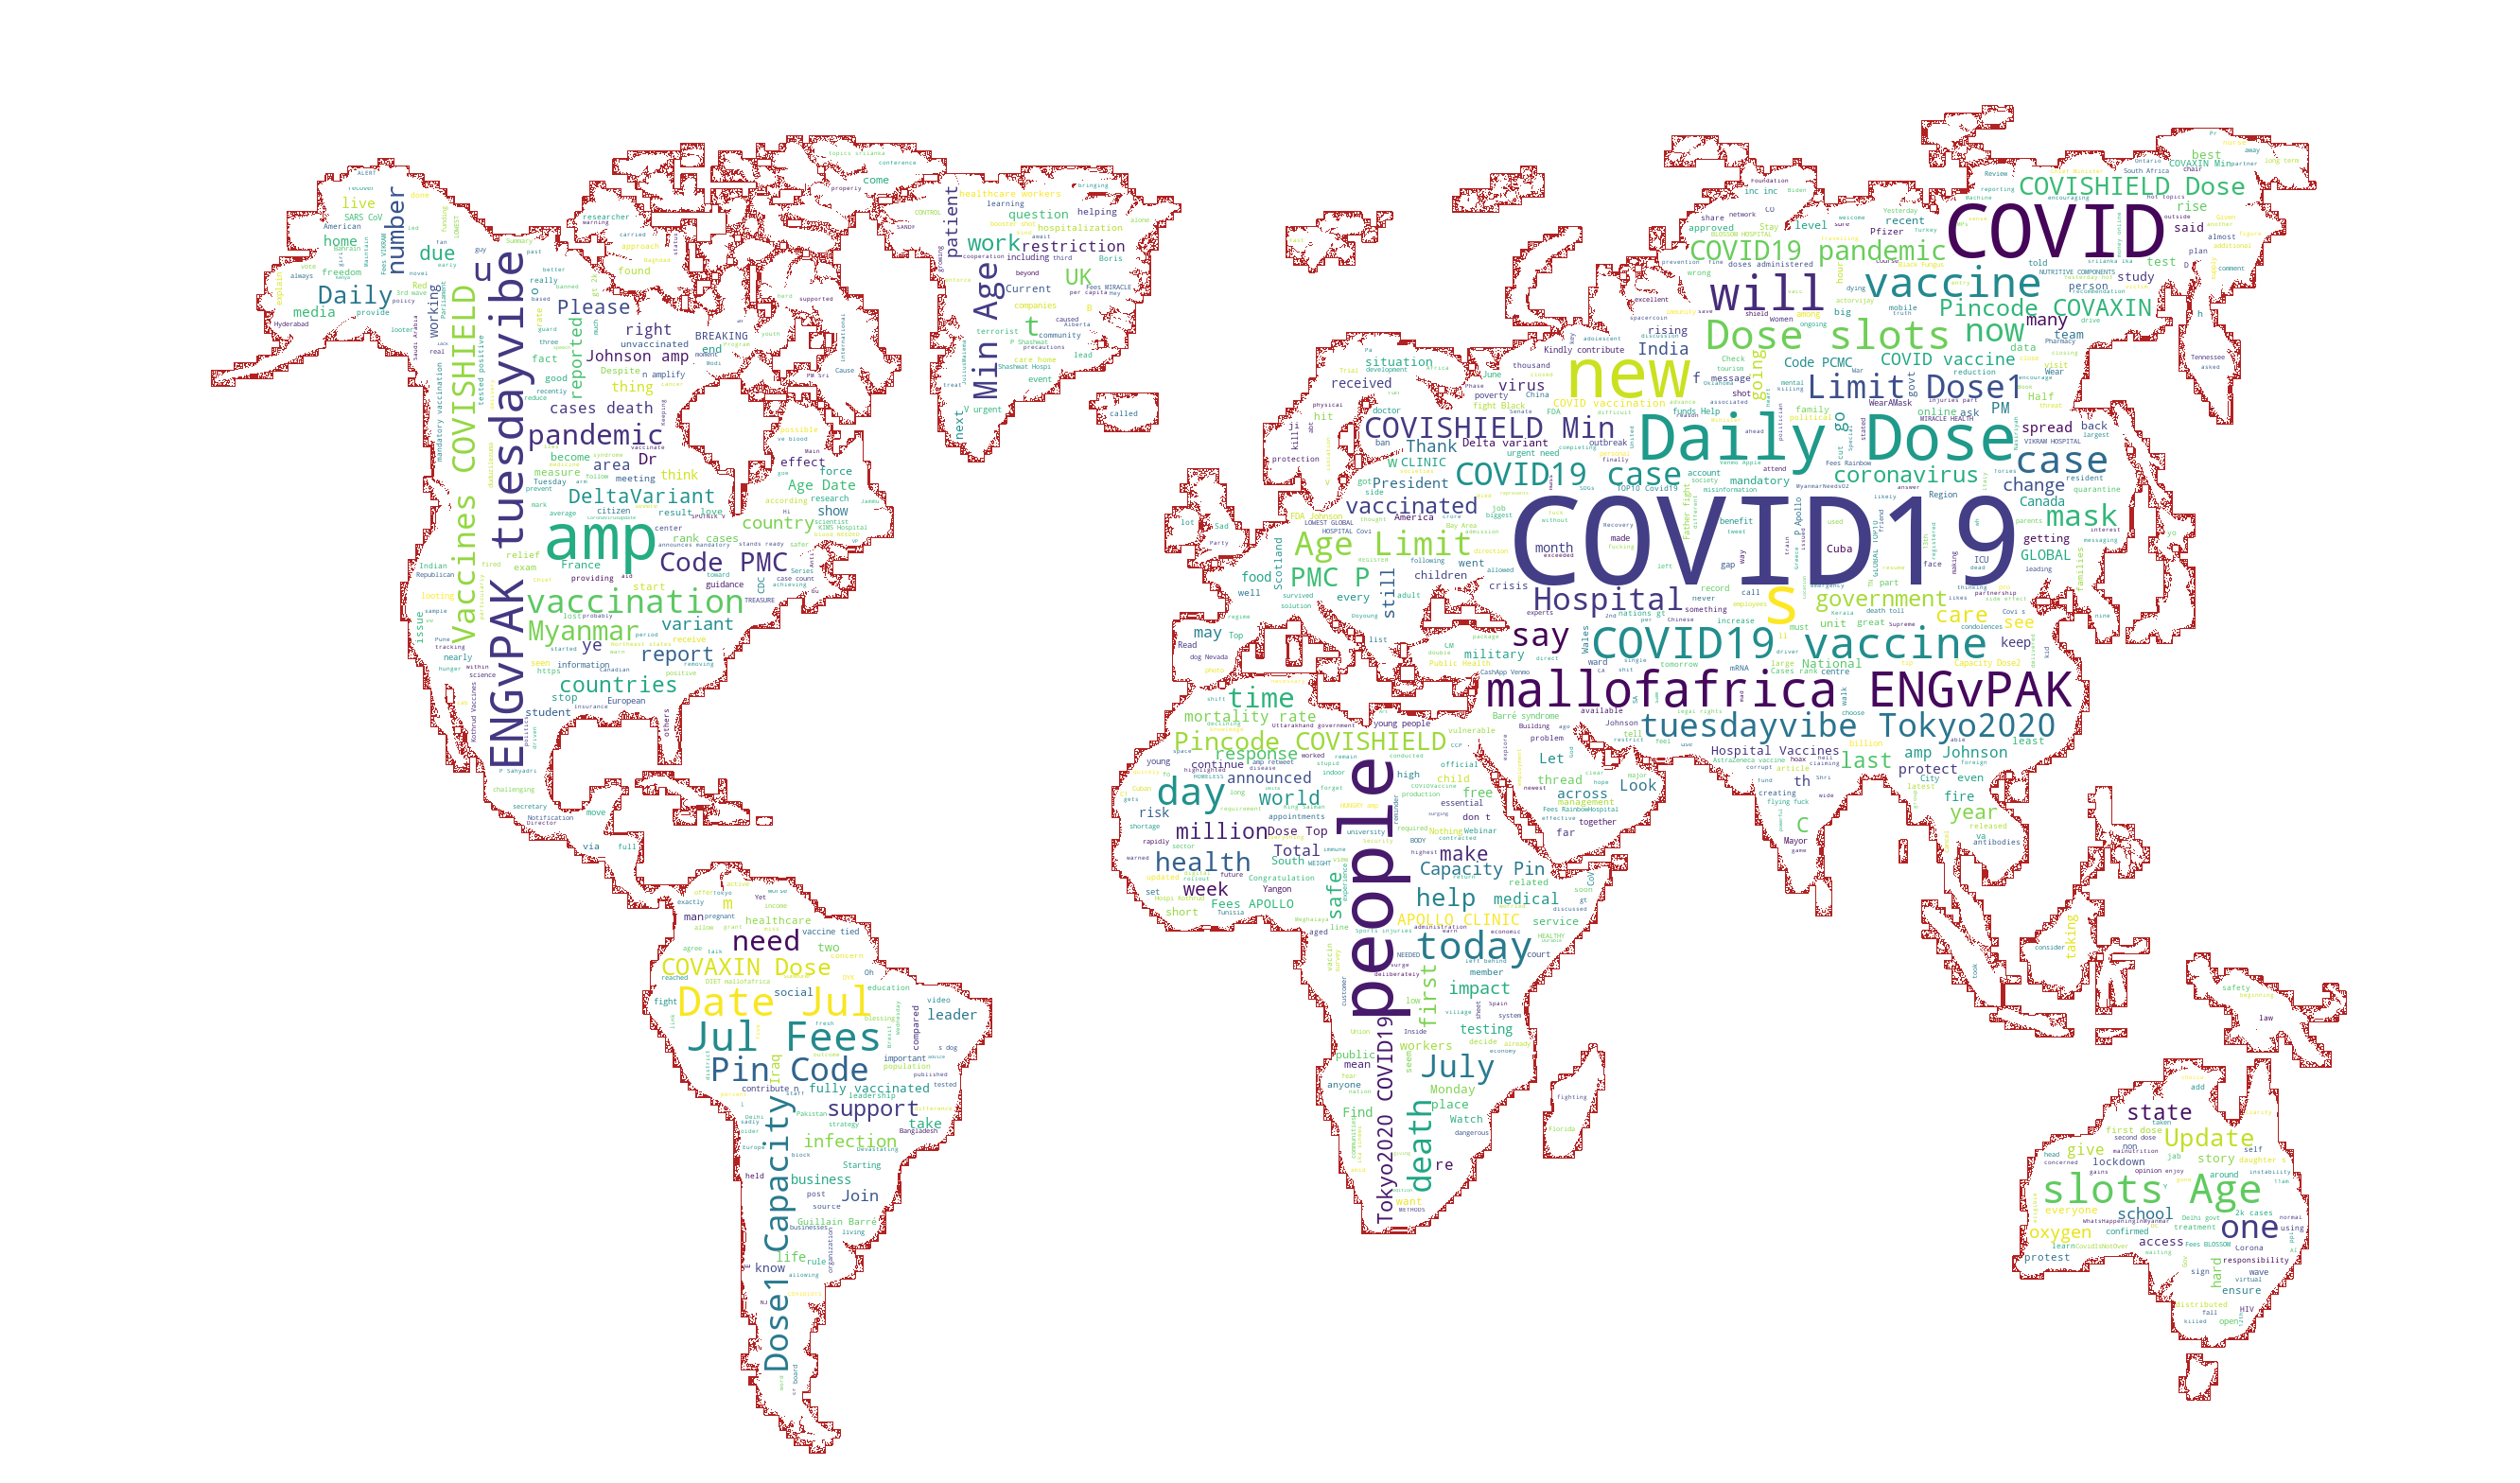

CPU times: user 17.1 s, sys: 341 ms, total: 17.5 s
Wall time: 17.6 s


In [16]:
%%time

# Function to create WordCloud
def create_wordcloud(data: pd.Series, mask_path: str, output_path: str) -> None:

    # combine all tweets into one textfield
    text = " ".join([tweet for tweet in data])

    # create stopword list:
    stopwords = set(STOPWORDS)
    # stopwords.update(["covid", "now", "will"])

    # read wordcloud template
    mask = np.array(Image.open(mask_path))

    # generate a word cloud image
    word_cloud = WordCloud(stopwords=stopwords, 
                           background_color="white",
                           max_words=1000,
                           contour_width=1, 
                           contour_color='firebrick',
                           random_state=21,
                           width=mask.shape[1],
                           height=mask.shape[0],
                           mask=mask)
    word_cloud.generate(text)
    
    # save the final wordcloud
    word_cloud.to_file(output_path)
    
    # display the result
    display(Image.open(output_path))


    
create_wordcloud(df["tweets"], "world_template.jpeg", "result_world_wc.png")


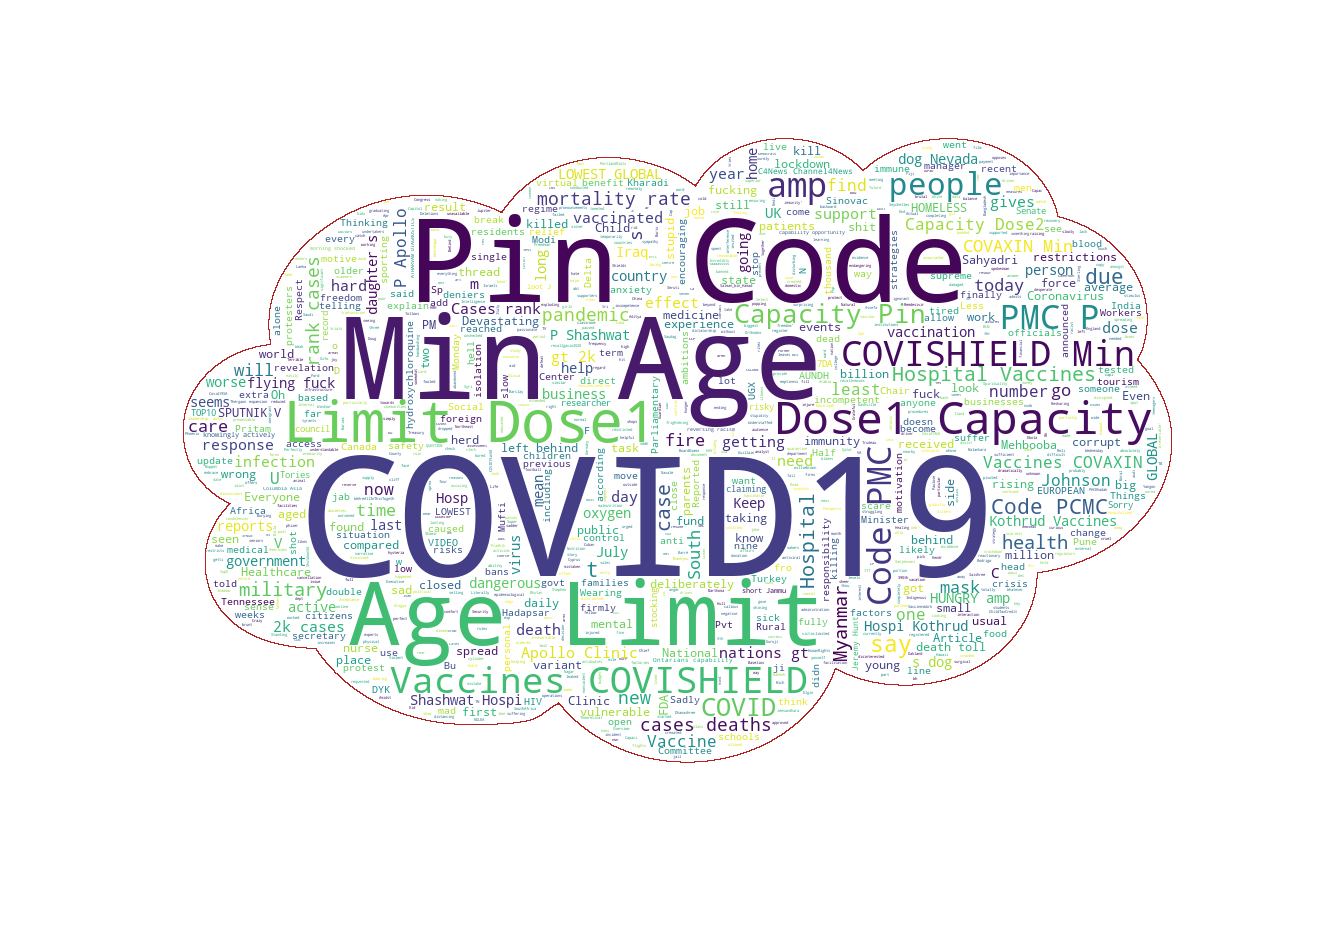

In [17]:
# create wordcloud for negative sentiment
create_wordcloud(df.query("sentiment == 'negative'")["tweets"], "cloud_template.png", "result_negative_wc.png")